# Predicting Pass Completion

## Data Preprocessing

In [1]:
from statsbombpy import sb
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Grabbing all matches for Chelsea F.C. for the 2015/16 season

In [3]:
premier_league_id = 2
season_1516_id = 27
team = 'Chelsea'

In [4]:
competions = sb.competitions()
pl = competions[competions['competition_id'] == premier_league_id].reset_index(drop=True)
pl = pl[pl['season_id'] == season_1516_id].reset_index(drop=True)
pl_matches = sb.matches(competition_id=premier_league_id, season_id=season_1516_id)
matches = pl_matches[(pl_matches['home_team'] == team) | (pl_matches['away_team'] == team)].reset_index(drop=True)
matches.sort_values(by='match_week', inplace=True)
matches.reset_index(drop=True, inplace=True)


In [5]:
matches[['match_date', 'match_week', 'home_team', 'away_team', 'season']].head(2)

,match_date,match_week,home_team,away_team,season
0,2015-08-08,1,Chelsea,Swansea City,2015/2016
1,2015-08-16,2,Manchester City,Chelsea,2015/2016


In [6]:
matches[['match_date', 'match_week', 'home_team', 'away_team', 'season']].tail(2)

,match_date,match_week,home_team,away_team,season
36,2016-05-07,37,Sunderland,Chelsea,2015/2016
37,2016-05-15,38,Chelsea,Leicester City,2015/2016


### Extracting all pass events for every Chelsea match in 2015/16

In [7]:
import pandas as pd

In [8]:
pass_features = ['player', 'player_id', 'possession_team',
                'location', 'pass_end_location', 'play_pattern',
                'pass_body_part', 'pass_angle', 'pass_height', 'pass_length', 'under_pressure',
                'pass_cross', 'pass_cut_back', 'pass_inswinging', 'pass_outswinging', 'pass_through_ball', 'pass_switch',
                'pass_outcome', 'type']

In [9]:
def sort_events(events):
    events.sort_values(by=['period', 'timestamp'], inplace=True)
    events.reset_index(drop=True, inplace=True)
    first_half = events[events['period'] == 1]
    first_half.sort_values(by='timestamp', inplace=True)
    first_half.reset_index(drop=True, inplace=True)
    second_half = events[events['period'] == 2]
    second_half.sort_values(by='timestamp', inplace=True)
    second_half.reset_index(drop=True, inplace=True)
    events = pd.concat([first_half, second_half])
    events.reset_index(drop=True, inplace=True)
    return events

In [10]:
events_dfs = []
for index, row in matches.iterrows():
    match_id = row['match_id']
    events = sb.events(match_id=match_id)
    events = sort_events(events)
    events_dfs.append(events)
events = pd.concat(events_dfs, ignore_index=True)
events = events[pass_features]
events = events[(events['type'] == 'Pass') & (events['possession_team'] == team)].reset_index(drop=True)
    

In [11]:
events

,player,player_id,possession_team,location,pass_end_location,play_pattern,pass_body_part,pass_angle,pass_height,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,pass_outcome,type
0,Eden Hazard,3621.0,Chelsea,"[42.7, 36.1]","[35.4, 48.6]",Regular Play,Right Foot,2.099368,Low Pass,14.475496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
1,Francesc Fàbregas i Soler,3478.0,Chelsea,"[34.3, 46.1]","[46.4, 30.6]",Regular Play,Right Foot,-0.907969,Ground Pass,19.663671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
2,Oscar dos Santos Emboaba Júnior,40122.0,Chelsea,"[47.4, 30.4]","[56.0, 43.6]",Regular Play,Right Foot,0.993357,Ground Pass,15.754364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
3,Eden Hazard,3621.0,Chelsea,"[77.7, 44.3]","[92.5, 69.0]",Regular Play,Right Foot,1.030972,Ground Pass,28.794617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
4,Branislav Ivanović,5594.0,Chelsea,"[95.2, 69.0]","[108.9, 59.2]",Regular Play,Right Foot,-0.620940,Ground Pass,16.844286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,Tammy Bakumo-Abraham,3440.0,Chelsea,"[52.4, 5.6]","[52.4, 11.1]",Regular Play,Head,1.570796,Low Pass,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
21380,Francesc Fàbregas i Soler,3478.0,Chelsea,"[52.6, 11.4]","[76.4, 7.8]",Regular Play,Right Foot,-0.150122,Ground Pass,24.070728,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
21381,Thibaut Courtois,3509.0,Chelsea,"[20.1, 5.4]","[83.8, 23.3]",From Free Kick,Left Foot,0.273940,High Pass,66.167210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
21382,Abdul Rahman Baba,12325.0,Chelsea,"[50.7, 0.1]","[55.7, 3.7]",From Throw In,NaN,0.624023,Low Pass,6.161169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass


### Cleaning data

In [12]:
import random

In [13]:
events.drop(columns=['possession_team', 'type'], inplace=True)

In [14]:
events['under_pressure'].fillna(False, inplace=True)
events['pass_cross'].fillna(False, inplace=True)
events['pass_cut_back'].fillna(False, inplace=True)
events['pass_inswinging'].fillna(False, inplace=True)
events['pass_outswinging'].fillna(False, inplace=True)
events['pass_through_ball'].fillna(False, inplace=True)
events['pass_switch'].fillna(False, inplace=True)
events['pass_outcome'].fillna('Complete', inplace=True)

In [15]:
def remove_low_pass_attempt_players(events, min_pass_attempts):
    pass_counts = events.groupby('player')['player'].transform('size')
    events = events[pass_counts >= min_pass_attempts].reset_index(drop=True)
    return events

In [16]:
min_pass_attempts = 200
events = remove_low_pass_attempt_players(events, min_pass_attempts)

In [17]:
def impute_pass_body_part(events):
    for index, row in events.iterrows():
        if pd.isnull(row['pass_body_part']):
            player = events[events['player'] == row['player']]
            right_foot = player['pass_body_part'].value_counts()['Right Foot']
            left_foot = player['pass_body_part'].value_counts()['Left Foot']
            right_foot_prob = right_foot / (right_foot + left_foot)
            rand_num = random.random()
            if rand_num < right_foot_prob:
                events.at[index, 'pass_body_part'] = 'Right Foot'
            else:
                events.at[index, 'pass_body_part'] = 'Left Foot'
    return events

In [18]:
events = impute_pass_body_part(events)

In [19]:
values_of_interest = ['Right Foot', 'Left Foot']
events = events[events['pass_body_part'].isin(values_of_interest)].reset_index(drop=True)

In [20]:
values_of_interest = ['Regular Play', 'From Throw In', 'From Free Kick', 'From Goal Kick',
                     'From Corner', 'From Kick Off', 'From Keeper', 'From Counter']
events = events[events['play_pattern'].isin(values_of_interest)].reset_index(drop=True)

In [21]:
out = events[events['pass_outcome'] == 'Out']
out.loc[:, 'pass_outcome'] = 'Incomplete'
events.update(out)
values_of_interest = ['Complete', 'Incomplete']
events = events[events['pass_outcome'].isin(values_of_interest)].reset_index(drop=True)

In [22]:
events['pass_normal'] = ~((events['pass_cross'] == True) |
    (events['pass_cut_back'] == True) |
    (events['pass_inswinging'] == True) |
    (events['pass_outswinging'] == True) |
    (events['pass_through_ball'] == True) |
    (events['pass_switch'] == True))

In [23]:
def extract_location_coordinates(events, features):
    for feature in features:
        location = events[feature].apply(pd.Series)
        x_name = feature + '_x'
        y_name = feature + '_y'
        events[x_name] = location[0]
        events[y_name] = location[1]
        events.drop(columns=[feature], inplace=True)
    return events


In [24]:
features_to_extract_location_coordinates = ['location', 'pass_end_location']
events = extract_location_coordinates(events, features_to_extract_location_coordinates)

In [25]:
def one_hot_encode(events, features):
    for feature in features:
        events[feature] = events[feature].str.lower()
        events[feature] = events[feature].str.replace(' ', '_')
        one_hot_encoded = pd.get_dummies(events[feature], prefix=feature, dtype=int)
        events = pd.concat([events, one_hot_encoded], axis=1)
        events.drop(columns=[feature], inplace=True)
    return events

In [26]:
features_to_one_hot_encode = ['play_pattern', 'pass_body_part', 'pass_height']
events = one_hot_encode(events, features_to_one_hot_encode)

In [27]:
def convert_to_binary_int(events, features):
    for feature in features:
        events[feature] = events[feature].astype(bool)
        events[feature] = events[feature].astype(int)
    return events

In [28]:
features_to_convert_to_binary_int = ['under_pressure', 'pass_cross', 'pass_cut_back', 'pass_inswinging', 
                                     'pass_outswinging', 'pass_through_ball', 'pass_switch', 'pass_normal']
events = convert_to_binary_int(events, features_to_convert_to_binary_int)

In [29]:
events['player_id'] = events['player_id'].astype(int)

In [30]:
events['pass_completed'] = events['pass_outcome'].map({'Complete': 1, 'Incomplete': 0}) # LABEL
events.drop(columns=['pass_outcome'], inplace=True)

In [31]:
events.columns

Index(['player', 'player_id', 'pass_angle', 'pass_length', 'under_pressure',
       'pass_cross', 'pass_cut_back', 'pass_inswinging', 'pass_outswinging',
       'pass_through_ball', 'pass_switch', 'pass_normal', 'location_x',
       'location_y', 'pass_end_location_x', 'pass_end_location_y',
       'play_pattern_from_corner', 'play_pattern_from_counter',
       'play_pattern_from_free_kick', 'play_pattern_from_goal_kick',
       'play_pattern_from_keeper', 'play_pattern_from_kick_off',
       'play_pattern_from_throw_in', 'play_pattern_regular_play',
       'pass_body_part_left_foot', 'pass_body_part_right_foot',
       'pass_height_ground_pass', 'pass_height_high_pass',
       'pass_height_low_pass', 'pass_completed'],
      dtype='object')

In [32]:
custom_name = team + "_pass_events.csv"
events.to_csv(custom_name, index=False)

## Modeling

### Model architecture

In [33]:
import torch
from torch import nn

In [34]:
class PassCompletionModel(nn.Module):
    def __init__(self, num_players, embedding_dim, num_features, output_size, dropout_rate):
        super(PassCompletionModel, self).__init__()
        self.player_embedding = nn.Embedding(num_embeddings=num_players, embedding_dim=embedding_dim)
        input_size = self.player_embedding.embedding_dim + num_features
        self.layers = nn.Sequential(
            nn.Linear(input_size, input_size * 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(input_size * 2, input_size * 4),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(input_size * 4, input_size * 8),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(input_size * 8, output_size)
        )

    def forward(self, player_ids, features):
        embeddings = self.player_embedding(player_ids)
        x = torch.cat((embeddings, features), dim=1)
        return self.layers(x)

### Functions to train and test model

In [35]:
from collections import defaultdict
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from torch import optim
from torch.utils.data import Dataset, DataLoader, Subset, TensorDataset

In [36]:
class PassEventsDataset(Dataset):
    def __init__(self, dataframe):
        self.df = dataframe

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        player_id = torch.tensor(self.df.iloc[idx, 0], dtype=torch.long)
        features = torch.tensor(self.df.iloc[idx, 1:-1].to_numpy(), dtype=torch.float32) 
        label = torch.tensor(self.df.iloc[idx, -1], dtype=torch.long)
        return player_id, features, label
    
    def get_player_ids(self):
        return self.df.iloc[:, 0].to_numpy()
    
    def get_features(self):
        return self.df.iloc[:, 1:-1].to_numpy()
    
    def get_labels(self):
        return self.df.iloc[:, -1]

In [37]:
def apply_smote_per_player(player_ids, features, labels):
    unique_player_ids = np.unique(player_ids)
    smote_player_ids = []
    smote_features = []
    smote_labels = []
    smote = SMOTE(random_state=42)
    for player_id in unique_player_ids:
        player_mask = player_ids == player_id
        player_features = features[player_mask]
        player_labels = labels[player_mask]
        player_features_resampled, player_labels_resampled = smote.fit_resample(player_features, player_labels)
        smote_player_ids.append(np.full(shape=len(player_labels_resampled), fill_value=player_id, dtype=np.int64))
        smote_features.append(player_features_resampled)
        smote_labels.append(player_labels_resampled)
    smote_player_ids = np.concatenate(smote_player_ids)
    smote_features = np.vstack(smote_features)
    smote_labels = np.concatenate(smote_labels)
    return smote_player_ids, smote_features, smote_labels

In [38]:
def get_float_feature_indxs(df):
    float_features = df.select_dtypes(include=['float64', 'float32']).columns
    float_feature_indxs = [df.columns.get_loc(column) for column in float_features]
    return float_feature_indxs

In [39]:
def standardize_data_loader(loader, float_feature_indxs, scaler, fit, shuffle):
    all_data = [batch for batch in loader]
    all_player_ids = torch.cat([data[0] for data in all_data])
    all_features = torch.cat([data[1] for data in all_data])  
    all_labels = torch.cat([data[2] for data in all_data])  
    float_features = all_features[:, float_feature_indxs]
    if fit:
        scaler.fit(float_features)
    standardized_float_features = torch.tensor(scaler.transform(float_features), dtype=torch.float32)
    all_features[:, float_feature_indxs] = standardized_float_features.clone()
    dataset = [(all_player_ids[i], all_features[i], all_labels[i]) for i in range(len(all_labels))]
    return DataLoader(dataset, batch_size=loader.batch_size, shuffle=shuffle)

In [40]:
def get_data_loaders(dataset, train_idxs, test_idxs, batch_size, smote):
    if smote:
        player_ids_train = dataset.get_player_ids()[train_idxs]  
        features_train = dataset.get_features()[train_idxs]     
        labels_train = dataset.get_labels()[train_idxs]          
        player_ids_train, features_train, labels_train = apply_smote_per_player(player_ids_train, features_train, labels_train)
        player_ids_train = torch.tensor(player_ids_train, dtype=torch.long)
        features_train = torch.tensor(features_train, dtype=torch.float32)
        labels_train = torch.tensor(labels_train, dtype=torch.long)
        train_subset = TensorDataset(player_ids_train, features_train, labels_train)
    else:
        train_subset = Subset(dataset, train_idxs)
    test_subset = Subset(dataset, test_idxs)
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
    float_feature_indxs = get_float_feature_indxs(dataset.df)
    scaler = StandardScaler()
    train_loader = standardize_data_loader(train_loader, float_feature_indxs, scaler, fit=True, shuffle=True)
    test_loader = standardize_data_loader(test_loader, float_feature_indxs, scaler, fit=False, shuffle=False)
    return train_loader, test_loader

In [41]:
def get_fresh_model_optimizer_criterion(num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay):
    model = PassCompletionModel(num_players, embedding_dim, num_features, output_size, dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()
    return model, optimizer, criterion

In [42]:
def train(model, optimizer, criterion, train_loader, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for player_ids, features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model.forward(player_ids, features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

In [43]:
def get_per_class_accuracy(predictions, true_labels):
    correct_count = defaultdict(int)
    total_count = defaultdict(int)
    for pred, label in zip(predictions, true_labels):
        total_count[label] += 1
        if pred == label:
            correct_count[label] += 1
    per_class_accuracy = {}
    for label in total_count:
        per_class_accuracy[label] = correct_count[label] / total_count[label]
    return per_class_accuracy

In [44]:
def test(model, test_loader):
    model.eval()
    with torch.no_grad():
        predictions, true_labels = [], []
        for player_ids, features, labels in test_loader:
            outputs = model.forward(player_ids, features)
            _, predicted_label = torch.max(outputs.detach(), 1)
            predictions.extend(predicted_label.tolist())
            true_labels.extend(labels.tolist())
    per_class_accuracy = get_per_class_accuracy(predictions, true_labels)
    return per_class_accuracy

In [45]:
def cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote):
    per_class_accuracies = defaultdict(list)
    per_class_avg_accuracy = []
    skf = StratifiedKFold(n_splits=num_folds)
    features = dataset.get_features()
    labels = dataset.get_labels()
    for train_idxs, test_idxs in skf.split(features, labels):
        train_loader, test_loader = get_data_loaders(dataset, train_idxs, test_idxs, batch_size, smote)
        model, optimizer, criterion = get_fresh_model_optimizer_criterion(num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay)
        train(model, optimizer, criterion, train_loader, num_epochs)
        per_class_accuracy = test(model, test_loader)
        for label in per_class_accuracy:
            per_class_accuracies[label].append(per_class_accuracy[label])
    for label in sorted(per_class_accuracies.keys()):
        class_avg_accuracy = sum(per_class_accuracies[label])/len(per_class_accuracies[label])
        per_class_avg_accuracy.append(class_avg_accuracy)
    return per_class_avg_accuracy

In [46]:
def plot_performance_vs_boolean_hyperparameter(hyperparameter, performance, hyperparameter_name):
    performance = np.transpose(np.array(performance))
    n_groups = len(hyperparameter)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    label_map = {0: "Incomplete", 1: "Complete"}
    for i, (label, accuracy) in enumerate(zip(label_map.keys(), performance)):
        bar_positions = index + bar_width * i
        bars = ax.bar(bar_positions, accuracy, bar_width, alpha=opacity, label=label_map[label])
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xlabel(hyperparameter_name)
    ax.set_ylabel('Accuracy')
    ax.set_title('Per-class Accuracy vs ' + hyperparameter_name)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([str(x) for x in hyperparameter])
    ax.legend()
    plt.tight_layout()

In [47]:
def plot_performance_vs_hyperparameter(hyperparameter, performance, hyperparameter_name):
    performance = np.transpose(np.array(performance))
    fig, ax = plt.subplots()
    label_map = {0: "Incomplete", 1: "Complete"}
    for label, accuracy in enumerate(performance):
        ax.plot(hyperparameter, accuracy, marker='o', label=label_map[label])
        for (x, y) in zip(hyperparameter, accuracy):
            ax.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='left', va='bottom')
    ax.set_xlabel(hyperparameter_name)
    ax.set_ylabel('Accuracy')
    ax.set_title('Per-class Accuracy vs ' + hyperparameter_name)
    ax.legend()

In [48]:
def plot_side_by_side_heatmaps(performance, batch_size_index, batch_size, learning_rates, dropout_rates):
    performance = np.array(performance)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 
    sns.heatmap(np.transpose(performance[batch_size_index, :, :, 0]), annot=True, cmap='coolwarm', xticklabels=learning_rates, yticklabels=dropout_rates, ax=axes[0])
    axes[0].set_title(f'Batch Size {batch_size} - Incomplete Pass Accuracy')
    axes[0].set_xlabel('Learning Rate')
    axes[0].set_ylabel('Dropout Rate')
    sns.heatmap(np.transpose(performance[batch_size_index, :, :, 1]), annot=True, cmap='coolwarm', xticklabels=learning_rates, yticklabels=dropout_rates, ax=axes[1])
    axes[1].set_title(f'Batch Size {batch_size} - Completed Pass Accuracy')
    axes[0].set_xlabel('Learning Rate')
    axes[0].set_ylabel('Dropout Rate')
    plt.tight_layout()

### Setting up modeling data

In [49]:
team = 'Chelsea'

In [50]:
file = team + '_pass_events.csv'
og_df = pd.read_csv(file)
new_df = og_df.copy(deep=True)
new_df.drop(columns=['player'], inplace=True)
unique_player_ids = pd.unique(new_df['player_id'])  
old_id_to_new_id = {old_id: new_id for new_id, old_id in enumerate(unique_player_ids)}
new_df['player_id'] = new_df['player_id'].map(old_id_to_new_id)
dataset = PassEventsDataset(new_df)

In [51]:
dataset.df

,player_id,pass_angle,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,...,play_pattern_from_keeper,play_pattern_from_kick_off,play_pattern_from_throw_in,play_pattern_regular_play,pass_body_part_left_foot,pass_body_part_right_foot,pass_height_ground_pass,pass_height_high_pass,pass_height_low_pass,pass_completed
0,0,2.099368,14.475496,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,1,-0.907969,19.663671,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
2,2,0.993357,15.754364,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,0,1.030972,28.794617,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,3,-0.620940,16.844286,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18628,6,-0.014319,41.904297,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
18629,1,-0.150122,24.070728,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
18630,9,0.273940,66.167210,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
18631,18,0.624023,6.161169,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1


In [52]:
num_players = len(np.unique(dataset.get_player_ids()))
num_features = dataset.get_features().shape[1]
output_size = 2

### Experiments

In [55]:
num_folds = 5

#### Applying SMOTE to address class imbalance

In [110]:
num_epochs = 10
batch_size = 128
embedding_dim = 11
dropout_rate = .2
learning_rate = .01
weight_decay = 0

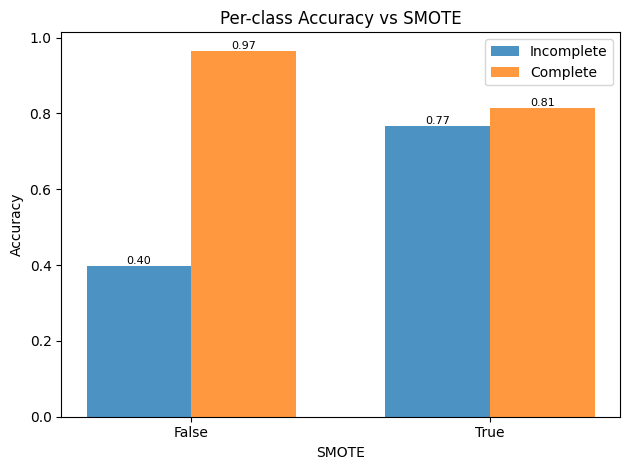

In [111]:
hyperparameter_name = "SMOTE"
should_smote = [False, True]
performance = []
for smote in should_smote:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)
plot_performance_vs_boolean_hyperparameter(should_smote, performance, hyperparameter_name)

#### Grid search over batch size, learning rate, and dropout rate

In [55]:
num_epochs = 10
embedding_dim = 11
smote = True

In [72]:
batch_sizes = [16, 32, 64, 128, 256]
learning_rates = [.0001, .00025, .0005, .00075, .001, .0025, .005, .0075, .01]
dropout_rates = [.1, .2, .3, .4, .5]

In [ ]:
bs_perf = []
for batch_size in batch_sizes:
    print(f'Batch size: {batch_size}')
    lr_perf = []
    for learning_rate in learning_rates:
        print(f'\tLearning rate: {learning_rate}')
        dr_perf = []
        for dropout_rate in dropout_rates:
            per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
            dr_perf.append(per_class_avg_accuracy)
        lr_perf.append(dr_perf)
    bs_perf.append(lr_perf)

In [102]:
np.save('nn_hyperparameter_search_performance.npy', bs_perf)

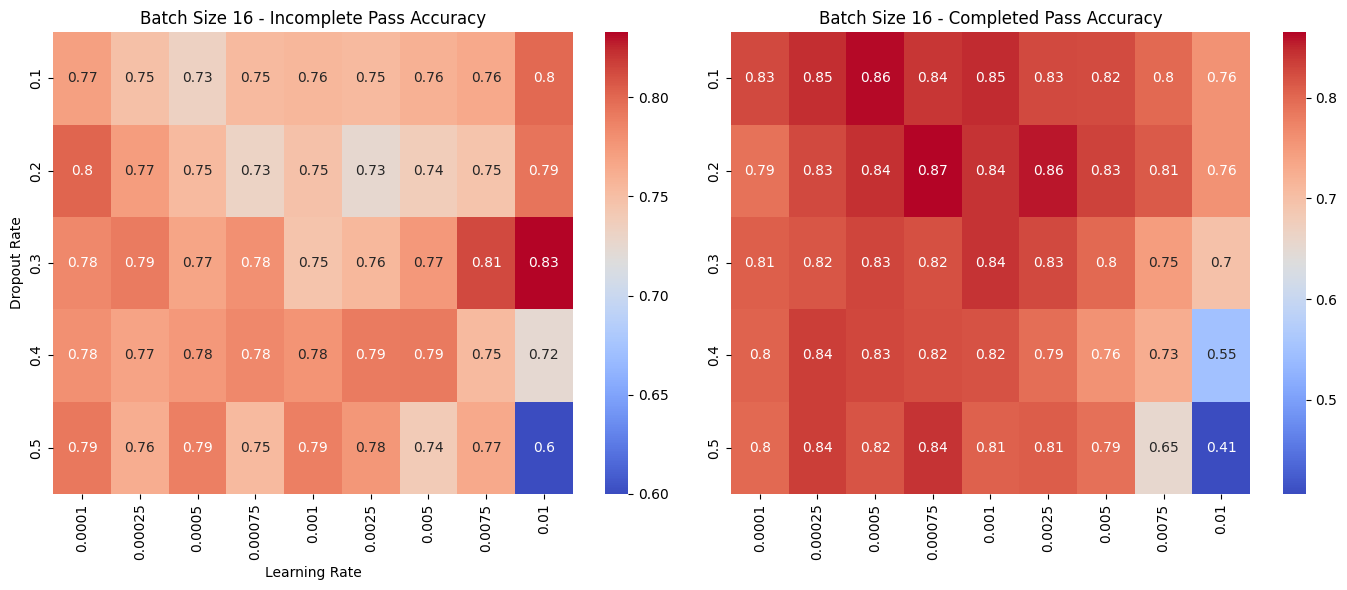

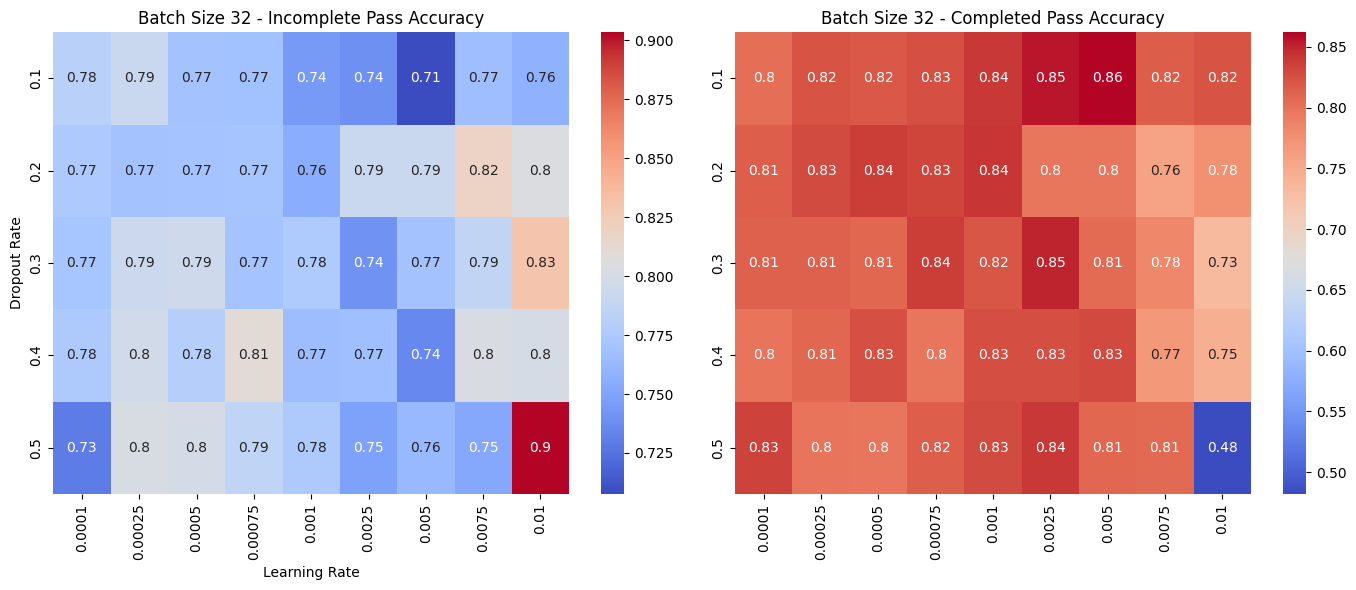

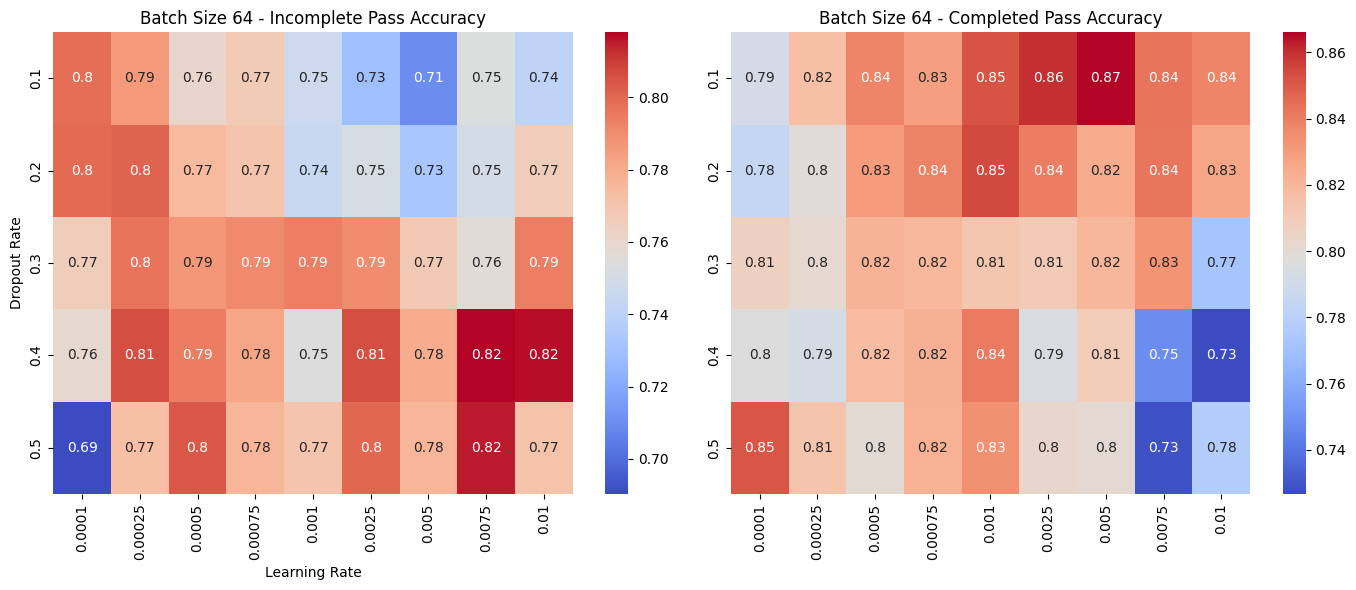

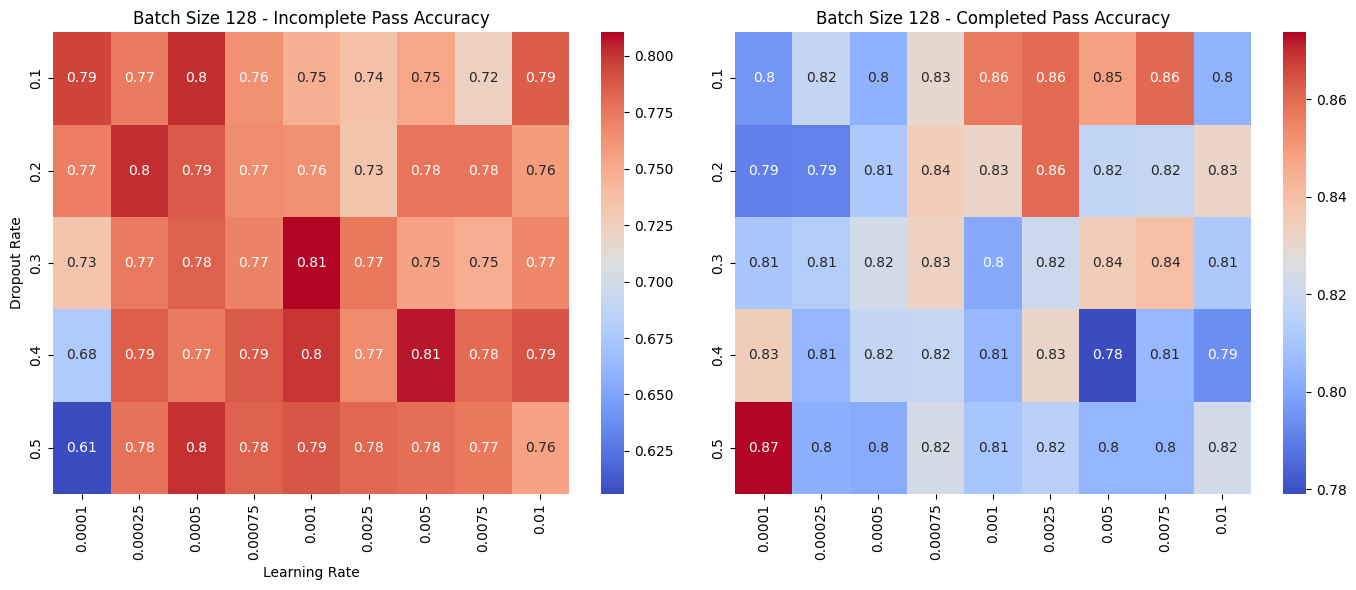

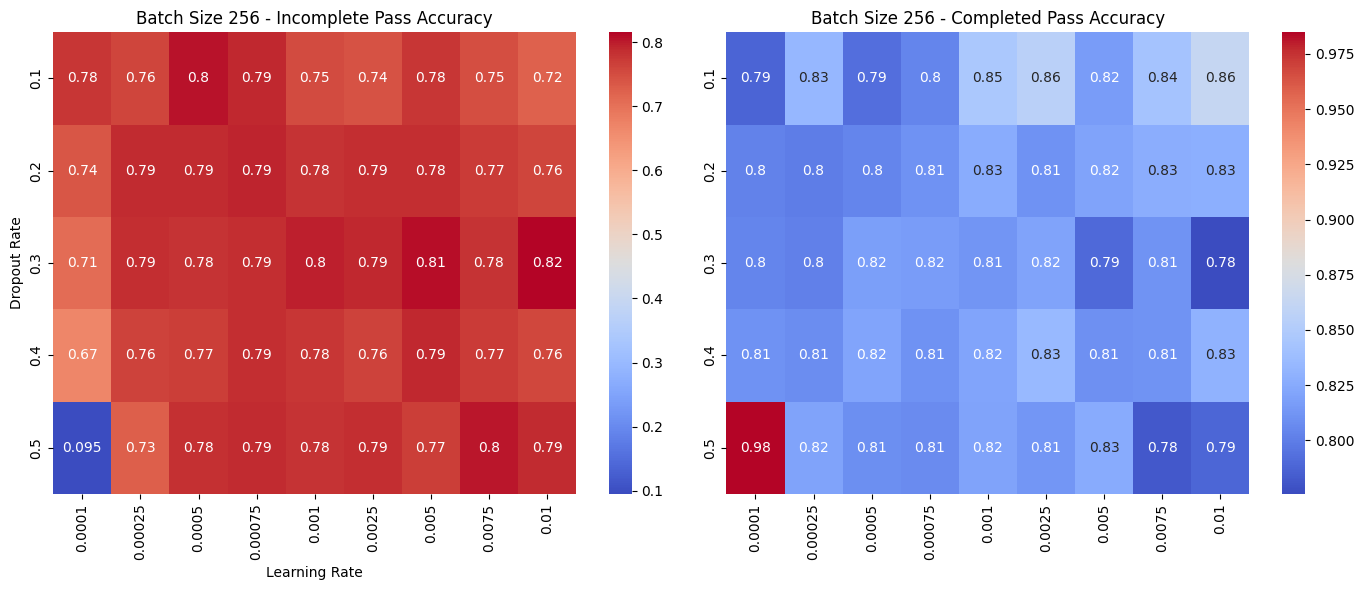

In [109]:
performance = np.load('nn_hyperparameter_search_performance.npy')
for batch_size_index, batch_size in enumerate(batch_sizes):
    plot_side_by_side_heatmaps(performance, batch_size_index, batch_size, learning_rates, dropout_rates)

#### Varying number of epochs

In [112]:
batch_size = 16
embedding_dim = 11
dropout_rate = .4
learning_rate = .0005
smote = True

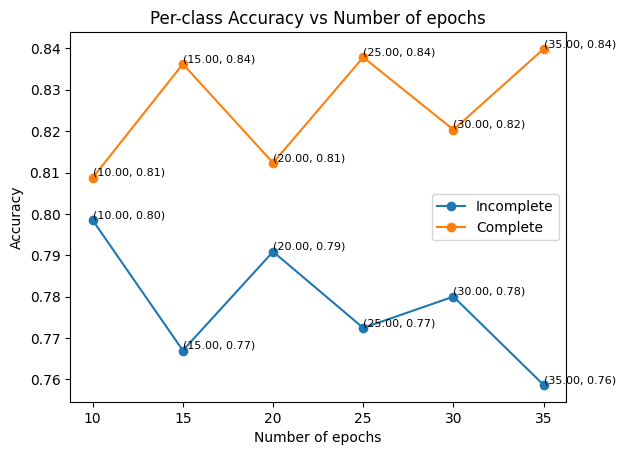

In [113]:
hyperparameter_name = "Number of epochs"
num_epochs_list = [10, 15, 20, 25, 30, 35]
performance = []
for num_epochs in num_epochs_list:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)
plot_performance_vs_hyperparameter(num_epochs_list, performance, hyperparameter_name)

#### Varying embedding layer dimensionality

In [114]:
num_epochs = 25
batch_size = 16
dropout_rate = .4
learning_rate = .0005
smote = True

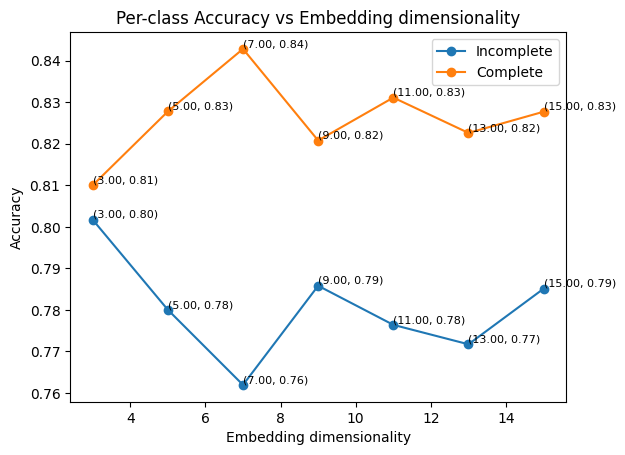

In [115]:
hyperparameter_name = "Embedding dimensionality"
embedding_dimensions = [3, 5, 7, 9, 11, 13, 15]
performance = []
for embedding_dim in embedding_dimensions:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)
plot_performance_vs_hyperparameter(embedding_dimensions, performance, hyperparameter_name)

#### Varying weight decay

In [57]:
num_epochs = 25
batch_size = 16
embedding_dim = 11
dropout_rate = .4
learning_rate = .0005
smote = True

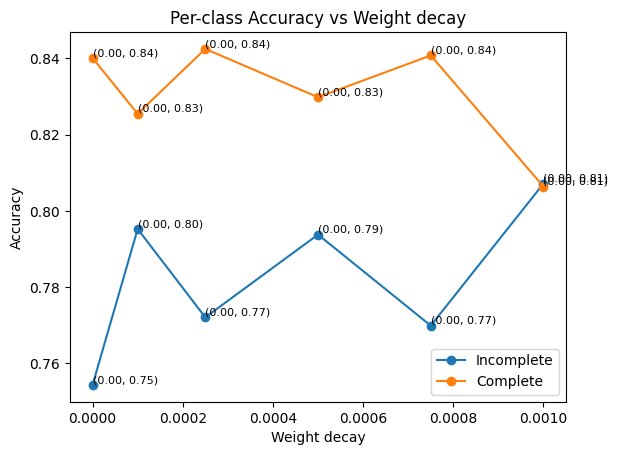

In [68]:
hyperparameter_name = "Weight decay"
weight_decays = [0, .0001, .00025, .0005, .00075, .001]
performance = []
for weight_decay in weight_decays:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)
plot_performance_vs_hyperparameter(weight_decays, performance, hyperparameter_name)

### Building final model

In [69]:
def get_train_loader(dataset, batch_size):
    player_ids_train = dataset.get_player_ids()
    features_train = dataset.get_features()   
    labels_train = dataset.get_labels()        
    player_ids_train, features_train, labels_train = apply_smote_per_player(player_ids_train, features_train, labels_train)
    player_ids_train = torch.tensor(player_ids_train, dtype=torch.long)
    features_train = torch.tensor(features_train, dtype=torch.float32)
    labels_train = torch.tensor(labels_train, dtype=torch.long)
    train_subset = TensorDataset(player_ids_train, features_train, labels_train)
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    float_feature_indxs = get_float_feature_indxs(dataset.df)
    scaler = StandardScaler()
    train_loader = standardize_data_loader(train_loader, float_feature_indxs, scaler, fit=True, shuffle=True)
    return train_loader

In [70]:
def train_final_model(dataset, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay):
    train_loader = get_train_loader(dataset, batch_size)
    model, optimizer, criterion = get_fresh_model_optimizer_criterion(num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay)
    train(model, optimizer, criterion, train_loader, num_epochs)
    return model

In [74]:
num_epochs = 25
batch_size = 16
embedding_dim = 11
dropout_rate = .4
learning_rate = .0005
weight_decay = .0005

In [75]:
model = train_final_model(dataset, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay)
torch.save(model.state_dict(), team + '_pass_completion_model.pth')

## Evaluation

### Setting up evaluation data

In [81]:
team = 'Chelsea'

In [82]:
file = team + '_pass_events.csv'
og_df = pd.read_csv(file)
new_df = og_df.copy(deep=True)
new_df.drop(columns=['player'], inplace=True)
unique_player_ids = pd.unique(new_df['player_id'])  
old_id_to_new_id = {old_id: new_id for new_id, old_id in enumerate(unique_player_ids)}
new_df['player_id'] = new_df['player_id'].map(old_id_to_new_id)
dataset = PassEventsDataset(new_df)

In [83]:
num_players = len(np.unique(dataset.get_player_ids()))
embedding_dim = 11
num_features = dataset.get_features().shape[1]
output_size = 2
dropout_rate = .4

In [84]:
model = PassCompletionModel(num_players, embedding_dim, num_features, output_size, dropout_rate)
model.load_state_dict(torch.load(team + '_pass_completion_model.pth'))
model.eval()

PassCompletionModel(
  (player_embedding): Embedding(19, 11)
  (layers): Sequential(
    (0): Linear(in_features=38, out_features=76, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=76, out_features=152, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=152, out_features=304, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=304, out_features=2, bias=True)
  )
)

In [85]:
players = og_df.drop_duplicates(subset=['player', 'player_id'])
old_id_to_player = dict(zip(players['player_id'], players['player']))
new_id_to_player = {}
for old_id, player in old_id_to_player.items():
    new_id = old_id_to_new_id[old_id]
    new_id_to_player[new_id] = player

In [86]:
new_id_to_player

{0: 'Eden Hazard',
 1: 'Francesc Fàbregas i Soler',
 2: 'Oscar dos Santos Emboaba Júnior',
 3: 'Branislav Ivanović',
 4: 'Gary Cahill',
 5: 'Diego da Silva Costa',
 6: 'César Azpilicueta Tanco',
 7: 'Willian Borges da Silva',
 8: 'Nemanja Matić',
 9: 'Thibaut Courtois',
 10: 'John Terry',
 11: 'Asmir Begović',
 12: 'Kurt Happy Zouma',
 13: 'Ramires Santos do Nascimento',
 14: 'Pedro Eliezer Rodríguez Ledesma',
 15: 'John Michael Nchekwube Obinna',
 16: 'Robert Kenedy Nunes do Nascimento',
 17: 'Ruben Loftus-Cheek',
 18: 'Abdul Rahman Baba'}